## Marketing STP
Segmentation, Targeting and Positioning

This notebook will contain a sequence of **`Positioning`**. The main study areas will be divided into three as following :
1. Purchase incident
2. Brand choice
3. Purchase quantity

The dataset and instructions are retrieved from [Customer Analytics in Python tutorial](https://www.udemy.com/course/customer-analytics-in-python/)

## Overview

- The dataset will firstly be segmented using the model defined in `Segmentaion.ipynb`
- Logistic regression and linear regression will be applied to perform purchase analysis and forecast.
- More details about the data can be found in the path : `data/purchase data legend.xlsx`

---
## `1.` Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

import os
import pickle

## `2.` Segmentation

### Import the segmentation method

In [2]:
def import_pickle_data(filename) :
    path = os.path.join(os.getcwd(), 'obj_data', filename)
    return pickle.load(open(path, 'rb')) #rb = read as byte datatype

In [3]:
scaler = import_pickle_data('scaler.pickle')
pca = import_pickle_data('pca.pickle')
kmeans_pca = import_pickle_data('kmeans_pca.pickle')

### Loading and assessing the data
The data has already been cleaned and neat

In [4]:
def import_csv(filePath) :
    return pd.read_csv(filePath)

In [5]:
filePath_purchase = os.path.join(os.getcwd(), 'data', 'purchase data.csv')
df_purchase = import_csv(filePath_purchase)

In [6]:
df_purchase.head()

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Promotion_3,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,200000001,1,0,0,0,0,0,1.59,1.87,2.01,...,0,0,0,0,0,47,1,110866,1,0
1,200000001,11,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,0,47,1,110866,1,0
2,200000001,12,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,0,47,1,110866,1,0
3,200000001,16,0,0,0,0,0,1.52,1.89,1.98,...,0,0,0,0,0,47,1,110866,1,0
4,200000001,18,0,0,0,0,0,1.52,1.89,1.99,...,0,0,0,0,0,47,1,110866,1,0


### `2-1` Standardization
the StandardScaler is expecting 7 features as input.

In [7]:
df_purchase.columns.values[-7:] # the 7 features standized 

array(['Sex', 'Marital status', 'Age', 'Education', 'Income',
       'Occupation', 'Settlement size'], dtype=object)

In [8]:
features_to_include = df_purchase.columns.values[-7:]
df_purchase_std = scaler.transform(df_purchase[features_to_include])

In [9]:
df_purchase_std.shape 

(58693, 7)

### `2-2` Dimentionality reduction (PCA)

In [10]:
df_purchase_pca = pca.transform(df_purchase_std)

In [11]:
df_purchase_pca.shape # features reduce down to 3

(58693, 3)

### `2-3` Kmeans clustering using PCA

In [12]:
purchase_cluster_kmeans_pca = kmeans_pca.predict(df_purchase_pca)

In [13]:
segment = purchase_cluster_kmeans_pca # clustered
df_purchase_analysis = df_purchase.copy()
df_purchase_analysis['Segment'] = segment

In [14]:
df_purchase_analysis['Segment'].value_counts()

0    21526
1    13677
2    12123
3    11367
Name: Segment, dtype: int64

---
## `3.` Exploratory Analysis by Segments
I will explore average purchase %, brand choice and sales by segments

In [15]:
# From Segmentation.ipynb

segment_index = {
    0 : 'Fewer Opportunity',
    1 : 'Career Focused',
    2 : 'Standard',
    3 : 'Well off'
}

In [16]:
df_purchase_analysis.head()

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Segment
0,200000001,1,0,0,0,0,0,1.59,1.87,2.01,...,0,0,0,0,47,1,110866,1,0,0
1,200000001,11,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,47,1,110866,1,0,0
2,200000001,12,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,47,1,110866,1,0,0
3,200000001,16,0,0,0,0,0,1.52,1.89,1.98,...,0,0,0,0,47,1,110866,1,0,0
4,200000001,18,0,0,0,0,0,1.52,1.89,1.99,...,0,0,0,0,47,1,110866,1,0,0


### Analysis by Customers

In [17]:
# Number of Visits 
temp1 = df_purchase_analysis[['ID','Incidence']].groupby('ID', as_index=True).count()
temp1.rename(columns={'Incidence':'N_visits'}, inplace=True)

In [18]:
# Number of Purchase
temp2 = df_purchase_analysis[['ID','Incidence']].groupby('ID', as_index=True).sum()
temp2.rename(columns={'Incidence':'N_purchase'}, inplace=True)

In [19]:
# Average purchase per visit
temp3 = df_purchase_analysis[['ID','Incidence']].groupby('ID', as_index=True).mean()
temp3.rename(columns={'Incidence':'Avg_purchase'}, inplace=True)

In [20]:
# Segment by ID
temp4 = df_purchase_analysis[['ID', 'Segment']].groupby('ID', as_index=True).mean()

In [21]:
# Concat all temp dataframes
purchase_by_id = pd.concat([temp1,temp2,temp3,temp4], axis=1)

In [22]:
purchase_by_id.head()

,N_visits,N_purchase,Avg_purchase,Segment
ID,,,,
200000001,101,9,0.089109,0
200000002,87,11,0.126437,3
200000003,97,10,0.103093,0
200000004,85,11,0.129412,0
200000005,111,13,0.117117,1


In [23]:
# Mapping with the more intuitive labelling
purchase_by_id['Segment'] = purchase_by_id['Segment'].map(segment_index)

In [93]:
segment_count = purchase_by_id[['N_purchase', 'Segment']].groupby('Segment').count() 

In [94]:
# Segment proportion
segment_prop = ( segment_count / purchase_by_id.shape[0] )
segment_prop.rename(columns={'N_purchase':'Segment_prop'}, inplace=True)

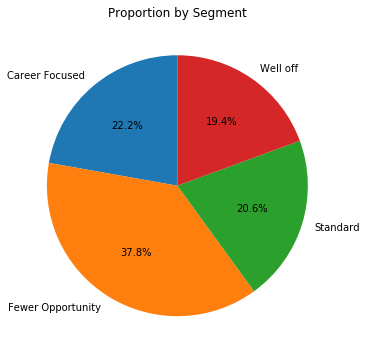

In [25]:
plt.figure(figsize=(8,6))
plt.title('Proportion by Segment')

plt.pie(x=segment_prop['Segment_prop'], autopct='%1.1f%%', 
        startangle=90, labels=segment_prop.index)
plt.show()

Fewer opportunity segment has the largest proportion of 37.8%, followed by Career focused, Standard and Well Off in order, which I believe is a fair representation intuitively but in real analysis this may need to be compared with the popluation of the study.

### `3-1`. Purchase incident by segment

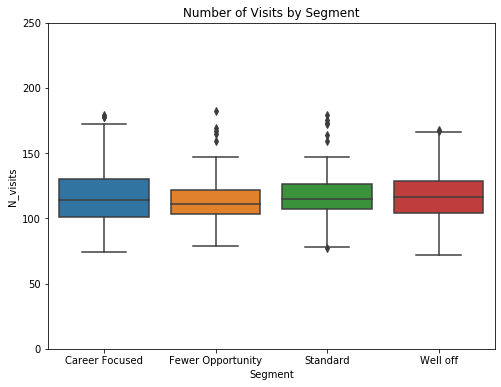

In [26]:
plt.figure(figsize=(8,6))
plt.ylim((0, 250)) # removing outliers for Career Focused
plt.title('Number of Visits by Segment')

sns.boxplot(data=purchase_by_id, x='Segment', y='N_visits', 
            order=['Career Focused', 'Fewer Opportunity', 'Standard', 'Well off'])
plt.show()

Another way of visualization using plt.bar

In [27]:
purchase_mean = purchase_by_id.groupby('Segment').mean()
purchase_std = purchase_by_id.groupby('Segment').std()

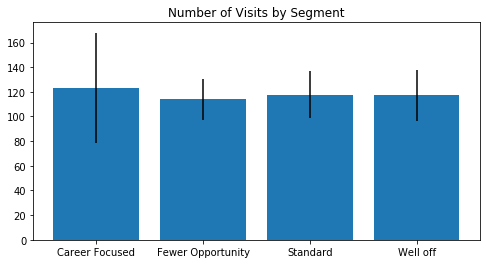

In [28]:
plt.figure(figsize=(8,4))
plt.title('Number of Visits by Segment')

plt.bar(x=purchase_mean.index,
        yerr=purchase_std['N_visits'],
        height=purchase_mean['N_visits'])
plt.show()

Career Focused segment shows the highest number of visits but with large variance of observations, while the other segments have relatively similar statistics.

In [29]:
purchase_mean.index

Index(['Career Focused', 'Fewer Opportunity', 'Standard', 'Well off'], dtype='object', name='Segment')

In [30]:
def vis_purchase_by_seg(title, y_axis, ylim=False, df = purchase_by_id, x_axis='Segment') :
    # draw two graphs side by side
    # to visualize descriptive statistics for purchase by segment 
    
    plt.figure(figsize=(12,4))
    plt.subplot(1, 2, 1)  
    
    if(x_axis=='Segment') :
        sns.boxplot(data=df, x=x_axis, y=y_axis, 
                    order=['Career Focused', 'Fewer Opportunity', 'Standard', 'Well off'])
    else :
        sns.boxplot(data=df, x=x_axis, y=y_axis)
        
    if(ylim) : 
        plt.ylim(ylim)
        
    plt.xticks(rotation=45) 
    
    plt.subplot(1, 2, 2)
    mean_by_segment = df.groupby(x_axis).mean()
    std_by_segment = df.groupby(x_axis).std()
    
    fig2=plt.bar(x = mean_by_segment.index,
            yerr=std_by_segment[y_axis],
            height=mean_by_segment[y_axis]) 
    
    if(ylim) : 
        plt.ylim(ylim)
    
    plt.xticks(rotation=45) 
    plt.show()
    

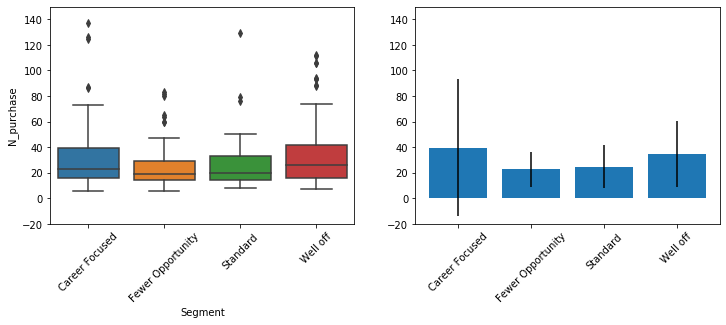

In [31]:
vis_purchase_by_seg('Number of Purchases by Segment', 'N_purchase', ylim=(-20,150))

Number of purchase is higher for Career Focused and Well off segments, whereas it shows wider spread for Career Focused indicating a high variance in observations within that segment.

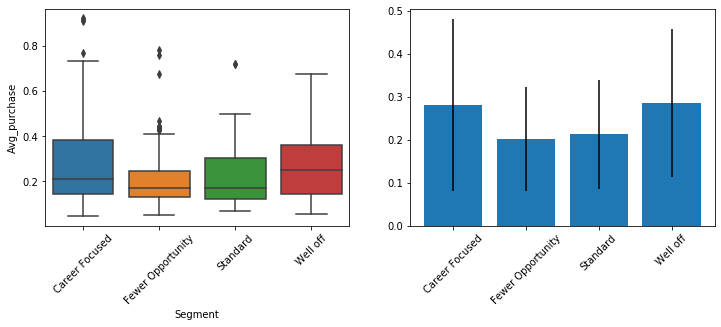

In [32]:
vis_purchase_by_seg('Average Purchase per Visit by Segment', 'Avg_purchase')

Compared to the visit, purchase is distinctly higher for the two segments : Career Focused and Well off. Fewer opportunity segment shows the lowest average purchase per visit. 

### `3-2`. Brand choice by segment

In [33]:
brand_by_id = df_purchase_analysis.query('Incidence==1')

In [39]:
total = brand_by_id.shape[0]
brand_by_id['Brand'].value_counts() / total 

5    0.340074
2    0.310288
4    0.199959
1    0.092226
3    0.057453
Name: Brand, dtype: float64

A quick overview : Brand 5 is most popular, followed closely by Brand 2.

In [35]:
brand_dummies = pd.get_dummies(data=brand_by_id['Brand'], prefix='Brand', prefix_sep='_')
brand_dummies['ID'], brand_dummies['Segment'] = brand_by_id['ID'], brand_by_id['Segment'] 

In [36]:
temp = brand_dummies.groupby('ID').mean()
brand_by_segment = temp.groupby('Segment').mean()

In [37]:
brand_by_segment.rename(index=segment_index, inplace=True)

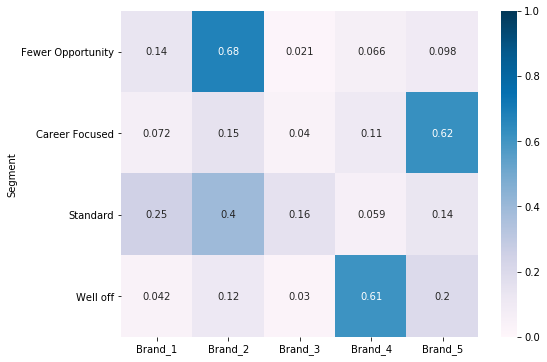

In [38]:
plt.figure(figsize=(8,6))

sns.heatmap(data=brand_by_segment, 
            vmin=0, vmax=1,
            cmap='PuBu', annot=True)

plt.show()

**Annedote |** Dataset is prepared in a way that Brands are ordered by price. In other words, Brand 1 is the cheapest and Brand 5 is the most expensive.

Dry description of the findings : Each brand shows distinctive difference in preference by segment.

- Overall product purchase in order : Brand 5 (34% of total), Brand 2(31%) and Brand 4 (20%).
- Brand 2 has been demanded well by Fewer Opporunity segment, and Standard segment.
- High-priced Brand 4 is favoured mostly by Well off segment with more spending power.
- Brand 5 is the most premium of all and purchased mostly by Career Focused segment.

### `3-3`. Brand revenue by segment
**Annecdote |**  When purchase happened, the customer selected a single brand.

In [51]:
df_purchase_analysis

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Segment
0,200000001,1,0,0,0,0,0,1.59,1.87,2.01,...,0,0,0,0,47,1,110866,1,0,0
1,200000001,11,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,47,1,110866,1,0,0
2,200000001,12,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,47,1,110866,1,0,0
3,200000001,16,0,0,0,0,0,1.52,1.89,1.98,...,0,0,0,0,47,1,110866,1,0,0
4,200000001,18,0,0,0,0,0,1.52,1.89,1.99,...,0,0,0,0,47,1,110866,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58688,200000500,703,0,0,0,2,1,1.41,1.85,2.01,...,0,0,0,0,42,1,120946,1,0,0
58689,200000500,710,0,0,0,0,0,1.36,1.84,2.09,...,0,0,0,0,42,1,120946,1,0,0
58690,200000500,717,0,0,0,0,0,1.50,1.80,2.14,...,0,0,0,0,42,1,120946,1,0,0
58691,200000500,722,1,2,3,0,0,1.51,1.82,2.09,...,0,0,0,0,42,1,120946,1,0,0


In [144]:
temp = df_purchase_analysis.query('Brand==1').copy()
temp['Revenue_1'] = temp['Quantity'] * temp['Price_1']
brand_1 = temp.loc[:, ['Segment','Revenue_1']].groupby('Segment').sum()

In [145]:
temp = df_purchase_analysis.query('Brand==2').copy()
temp['Revenue_2'] = temp['Quantity'] * temp['Price_2']
brand_2 = temp.loc[:, ['Segment','Revenue_2']].groupby('Segment').sum()

In [146]:
temp = df_purchase_analysis.query('Brand==3').copy()
temp['Revenue_3'] = temp['Quantity'] * temp['Price_3']
brand_3 = temp.loc[:, ['Segment','Revenue_3']].groupby('Segment').sum()

In [147]:
temp = df_purchase_analysis.query('Brand==4').copy()
temp['Revenue_4'] = temp['Quantity'] * temp['Price_4']
brand_4 = temp.loc[:, ['Segment','Revenue_4']].groupby('Segment').sum()

In [148]:
temp = df_purchase_analysis.query('Brand==5').copy()
temp['Revenue_5'] = temp['Quantity'] * temp['Price_5']
brand_5 = temp.loc[:, ['Segment','Revenue_5']].groupby('Segment').sum()

In [150]:
brand_revenue_by_segment = pd.concat([brand_1, brand_2, brand_3, brand_4, brand_5], axis=1)
brand_revenue_by_segment.index = brand_revenue_by_segment.index.map(segment_index)

In [154]:
brand_revenue_by_segment['total'] = (
    brand_revenue_by_segment['Revenue_1'] +
    brand_revenue_by_segment['Revenue_2'] +
    brand_revenue_by_segment['Revenue_3'] +
    brand_revenue_by_segment['Revenue_4'] +
    brand_revenue_by_segment['Revenue_5'] 
)

In [158]:
brand_revenue_by_segment = brand_revenue_by_segment.join(segment_prop, on='Segment')
brand_revenue_by_segment = brand_revenue_by_segment.join(segment_count, on='Segment')

In [159]:
brand_revenue_by_segment

,Revenue_1,Revenue_2,Revenue_3,Revenue_4,Revenue_5,total,Segment_prop,N_purchase
Segment,,,,,,,,
Fewer Opportunity,2258.90,13909.78,722.06,1805.59,2214.82,20911.15,0.378,189
Career Focused,736.09,1791.78,664.75,2363.84,19456.74,25013.20,0.222,111
Standard,2611.19,4768.52,3909.17,861.38,2439.75,14590.01,0.206,103
Well off,699.47,1298.23,725.54,14009.29,5509.69,22242.22,0.194,97


In [162]:
# Basket size per segment
basket_size_by_segment = brand_revenue_by_segment['total'] / brand_revenue_by_segment['N_purchase']
basket_size_by_segment

Segment
Fewer Opportunity    110.641005
Career Focused       225.344144
Standard             141.650583
Well off             229.301237
dtype: float64

In [163]:
# Percentage of total revenue by segment
brand_revenue_by_segment['total'] / brand_revenue_by_segment['total'].sum()

Segment
Fewer Opportunity    0.252683
Career Focused       0.302250
Standard             0.176300
Well off             0.268767
Name: total, dtype: float64

Across all the brands, total revenue is topped by Career Focused segment. It is largely helped by large basket size (spend per purchase) by large porportion of the segment purchasing Brand 5 (high-priced). The similar purchasing pattern can be observed for Well off segment - accounting for 27% of the total revenue.

Although basket size is the smallest, Lower Opportunity segment also contributes to the overall revenue, from the large number of purchases - with particular preference of lower-priced Brand 2. 